# Track particles

In [1]:
# Libraries ----
import sys  # type: ignore
import imageio  # type: ignore
import warnings
import numpy as np  # type: ignore
import pandas as pd  # type: ignore

from tqdm import tqdm  # type: ignore

sys.path.append('../modules')
import track_particles as tp  # type: ignore
import plot_tracking as plt_tp  # type: ignore

# Global options ----
warnings.filterwarnings("ignore")
pd.options.mode.chained_assignment = None
pd.set_option('display.max_columns', None)

## Global variables

In [2]:
input_path = "../input_files"
output_path = "../output_files"
log_path = "../logs"
input_generation_date = "2025-02-18"

video_name = "3n_3m_0f_230522_1"
n_particles = int(video_name[0])
partition = 3
step = 3
t0 = int(partition * 3e4)
tf = int((partition + 1) * 3e4)
if partition == 3:
    tf = 108311 - 3 + step  # Total number of frames in video
times = np.arange(t0, tf, step)  # num_frames
save_figures = True
save_tracking = False
x_bounds = [0, 1080]
y_bounds = [80, 1840]
x_zoom = [0, 1080]
y_zoom = [0, 1920]
print("N particles:", n_particles)
print("Tracked frames from", times[0], "to", times[-1], "with", len(times), "tracked frames")

N particles: 3
Tracked frames from 90000 to 108309 with 6104 tracked frames


## Setting video information

In [3]:
# Load the video
reader = imageio.get_reader("{}/{}.mp4".format(input_path, video_name), "ffmpeg")

# Check the number of frames
num_frames = reader.count_frames()
print("Total frames: {}".format(num_frames))

# Extract a frame to inspect the content
time = 0
frame = reader.get_data(time)
print("Frames resolution: {} x {}".format(frame.shape[0], frame.shape[1]))

Total frames: 108311
Frames resolution: 1080 x 1920


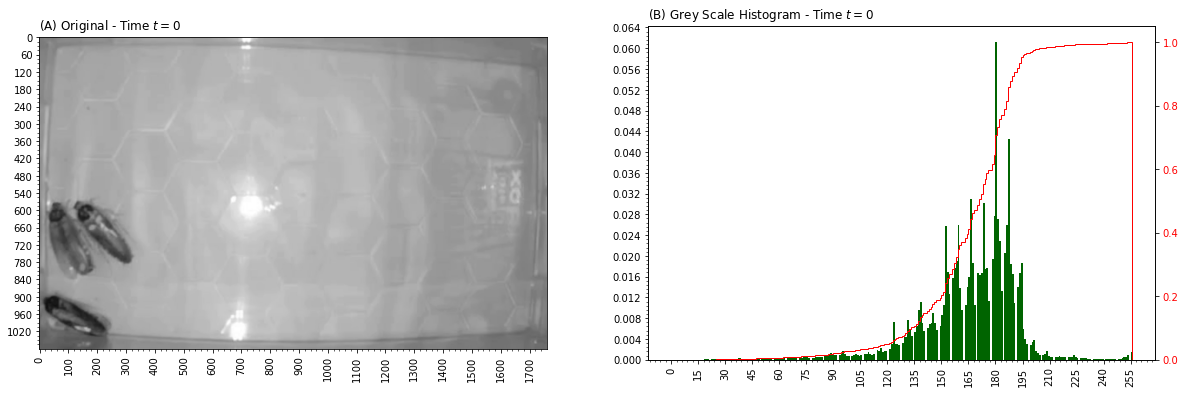

In [4]:
# Original Frame
time = 0
width = 10
width_ratio = 1
n_x_breaks = 20
n_y_breaks = 20
x_bounds = x_bounds  # Range: [0, 1080]
y_bounds = y_bounds  # Range: [0, 1920]
x_zoom = None  # x_zoom
y_zoom = None  # y_zoom

plt_tp.plot_normal_frame(
    reader=reader,
    time=time,
    width=width,
    width_ratio=width_ratio,
    n_x_breaks=n_x_breaks,
    n_y_breaks=n_y_breaks,
    x_bounds=x_bounds,
    y_bounds=y_bounds,
    x_zoom=x_zoom,
    y_zoom=y_zoom
)

## Profiling video information

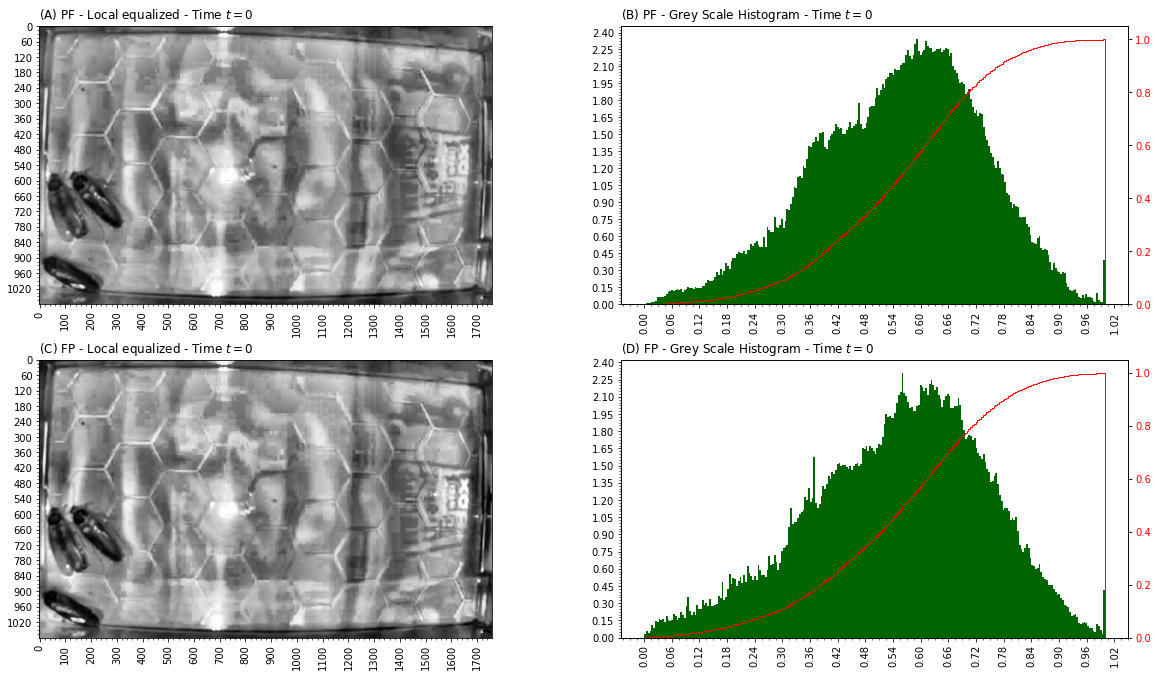

In [5]:
# Original Frame
time = 0
width = 10
width_ratio = 1
type = "local equalized"
clip_limit = 0.05
n_x_breaks = 20
n_y_breaks = 20
x_bounds = x_bounds  # Range: [0, 1080]
y_bounds = y_bounds  # Range: [0, 1920]
x_zoom = None  # x_zoom
y_zoom = None  # y_zoom

plt_tp.plot_profiled_frame(
    reader=reader,
    time=time,
    width=width,
    width_ratio=width_ratio,
    type=type,
    clip_limit=clip_limit,
    n_x_breaks=n_x_breaks,
    n_y_breaks=n_y_breaks,
    x_bounds=x_bounds,
    y_bounds=y_bounds,
    x_zoom=x_zoom,
    y_zoom=y_zoom
)

## Boundaries and contours definition

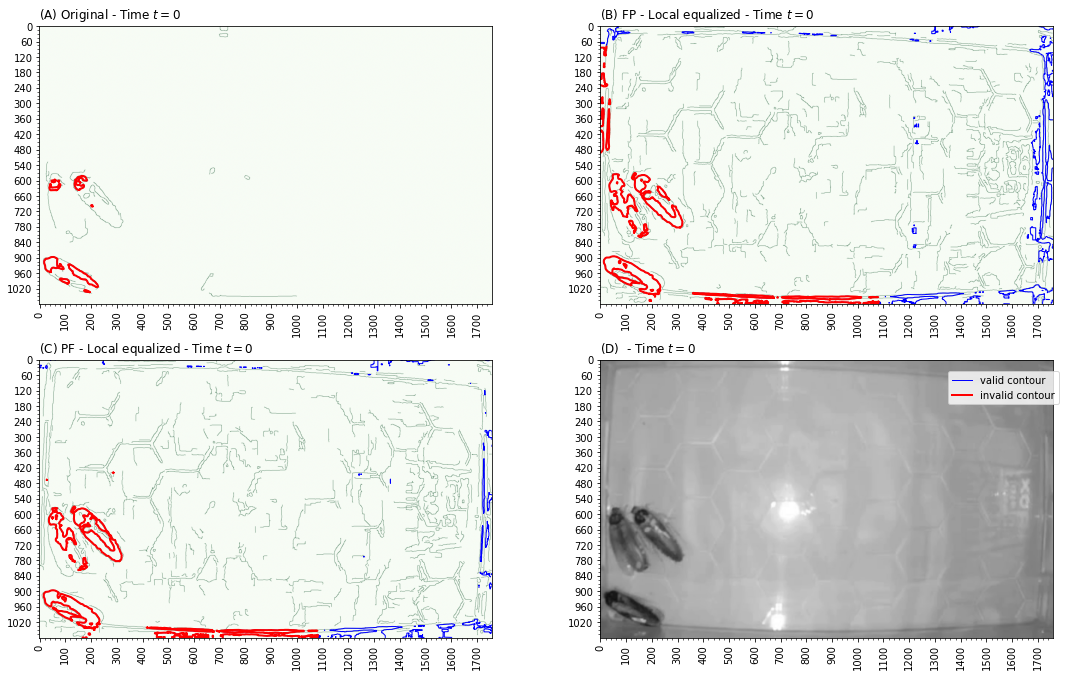

In [6]:
# Original frame
time = 0
width = 10
width_ratio = 1
type = "local equalized"
clip_limit = 0.05
threshold = 0.19
sigma = 2.0
n_x_breaks = 20
n_y_breaks = 20
x_bounds = x_bounds  # Range: [0, 1080]
y_bounds = y_bounds  # Range: [0, 1920]
x_zoom = None  # x_zoom
y_zoom = None  # y_zoom
fancy_legend = True
x_legend = 0.83
y_legend = 0.46

plt_tp.plot_boundary_edge_frame(
    reader=reader,
    time=time,
    width=width,
    width_ratio=width_ratio,
    type=type,
    clip_limit=clip_limit,
    threshold=threshold,
    sigma=sigma,
    n_x_breaks=n_x_breaks,
    n_y_breaks=n_y_breaks,
    x_bounds=x_bounds,
    y_bounds=y_bounds,
    x_zoom=x_zoom,
    y_zoom=y_zoom,
    fancy_legend=fancy_legend,
    x_legend=x_legend,
    y_legend=y_legend
)

## Do tracking algorithm

,id,time,position_x,position_y,weighted_x,weighted_y,darkest_v,darkest_x,darkest_y,lightest_v,lightest_x,lightest_y,orientation,area,axis_major,axis_minor,eccentricity
5,0,0,1474.065,4.580,1473.958,4.599,0.000,1425.000,2.000,0.514,1425.000,0.000,1.567,841.000,100.164,15.752,0.988
55,1,0,80.964,660.129,82.713,664.418,nan,80.964,660.129,nan,80.964,660.129,0.376,6266.000,185.369,78.190,0.907
59,2,0,245.673,705.788,246.479,702.986,nan,245.673,705.788,nan,245.673,705.788,0.738,8881.000,220.457,92.582,0.908
81,3,0,128.580,967.699,137.313,974.610,nan,128.580,967.699,nan,128.580,967.699,1.051,12387.000,270.783,82.682,0.952
84,4,0,1696.272,1029.412,1696.162,1029.410,0.000,1691.000,1009.000,0.424,1687.000,1042.000,1.406,1266.000,116.176,30.267,0.965
92,5,0,1280.511,1057.093,1278.913,1057.228,0.000,1331.000,1037.000,0.545,1292.000,1068.000,-1.556,4881.000,223.510,50.307,0.974
105,6,0,509.566,1070.120,510.320,1070.138,nan,509.566,1070.120,nan,509.566,1070.120,1.543,1920.000,139.417,21.664,0.988


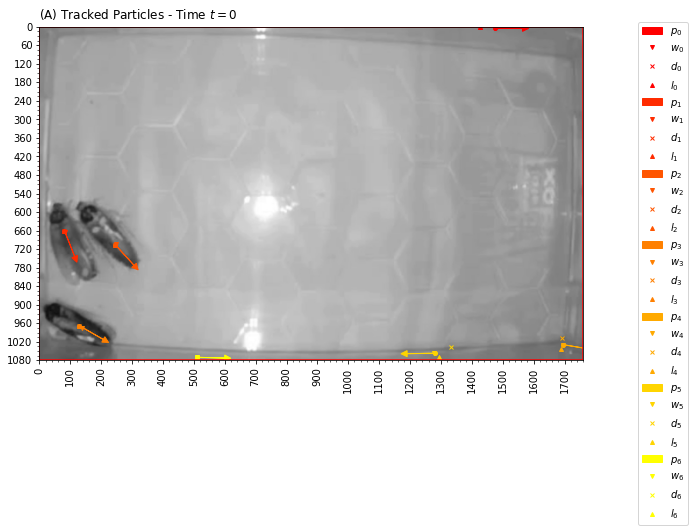

In [7]:
# Original frame
time = 0
reinforce_boundaries = True
remove_holes = False
remove_boundaries = True
type = "local equalized"
clip_limit = 0.05
threshold = 0.19
sigma = 2.0
x_bounds = x_bounds  # Range: [0, 1080]
y_bounds = y_bounds  # Range: [0, 1920]
region_area_min = 200
axis_major_min = 94
eccentricity_max = 0.99
width = 10
n_x_breaks = 20
n_y_breaks = 20
x_zoom = None  # x_zoom
y_zoom = None  # y_zoom
fancy_legend = True
x_legend = 1.001
y_legend = 0.891

df_tracked_frame = tp.process_frame(
    reinforce_boundaries=reinforce_boundaries,
    remove_holes=remove_holes,
    remove_boundaries=remove_boundaries,
    type=type,
    clip_limit=clip_limit,
    threshold=threshold,
    sigma=sigma,
    x_bounds=x_bounds,
    y_bounds=y_bounds,
    region_area_min=region_area_min,
    axis_major_min=axis_major_min,
    eccentricity_max=eccentricity_max,
    tracking_list=[time, reader.get_data(time)]
)

plt_tp.plot_tracking_frame(
    reader=reader,
    df_tracked_frame=df_tracked_frame,
    width=width,
    n_x_breaks=n_x_breaks,
    n_y_breaks=n_y_breaks,
    x_bounds=x_bounds,
    y_bounds=y_bounds,
    x_zoom=x_zoom,
    y_zoom=y_zoom,
    fancy_legend=fancy_legend,
    x_legend=x_legend,
    y_legend=y_legend,
    save_figure=False,
    output_path=output_path,
    output_name=video_name,
    time=time
)

df_tracked_frame.style.format(precision=3)

### All frames

In [8]:
# Original frame
reinforce_boundaries = True
remove_holes = False
remove_boundaries = True
type = "local equalized"
clip_limit = 0.05
threshold = 0.19
sigma = 2.0
x_bounds = x_bounds  # Range: [0, 1080]
y_bounds = y_bounds  # Range: [0, 1920]
region_area_min = 200
axis_major_min = 94
eccentricity_max = 0.99
width = 10
n_x_breaks = 20
n_y_breaks = 20

df_tracked_frames = tp.process_multiple_frames(
    reader=reader,
    times=times,
    reinforce_boundaries=reinforce_boundaries,
    remove_holes=remove_holes,
    remove_boundaries=remove_boundaries,
    clip_limit=clip_limit,
    type=type,
    threshold=threshold,
    sigma=sigma,
    x_bounds=x_bounds,
    y_bounds=y_bounds,
    region_area_min=region_area_min,
    axis_major_min=axis_major_min,
    eccentricity_max=eccentricity_max
)

df_tracked_frames.head(n_particles)

100%|███████████████████| 6104/6104 [03:32<00:00, 28.77it/s]


,id,time,position_x,position_y,weighted_x,weighted_y,darkest_v,darkest_x,darkest_y,lightest_v,lightest_x,lightest_y,orientation,area,axis_major,axis_minor,eccentricity,id_count
0,0,90000,1032.935980,791.631115,1033.149647,791.083634,NaN,1032.935980,791.631115,NaN,1032.935980,791.631115,1.170901,7482.0,149.623332,82.181421,0.835655,7
1,1,90000,54.432182,827.028480,55.649837,825.135896,NaN,54.432182,827.028480,NaN,54.432182,827.028480,0.173100,5618.0,185.512329,56.129611,0.953129,7
2,2,90000,105.216605,962.624723,104.289957,962.027456,NaN,105.216605,962.624723,NaN,105.216605,962.624723,0.759036,2710.0,112.663812,49.725298,0.897330,7


## Update incorrect tracked frames

In [9]:
times_new = df_tracked_frames[df_tracked_frames["id_count"] < n_particles]["time"].unique()
remove_holes_new = True
threshold_new = 0.11
sigma_new = 1.5
print("Incorrect tracking particles at {} times:\n{}".format(len(times_new), times_new))

if len(times_new > 1):
    df_tracked_frames_new = tp.process_multiple_frames(
        reader=reader,
        times=times_new,
        reinforce_boundaries=reinforce_boundaries,
        remove_holes=remove_holes_new,
        remove_boundaries=remove_boundaries,
        clip_limit=clip_limit,
        type=type,
        threshold=threshold_new,
        sigma=sigma,
        x_bounds=x_bounds,
        y_bounds=y_bounds,
        region_area_min=region_area_min,
        axis_major_min=axis_major_min,
        eccentricity_max=eccentricity_max
    )
    times_new_2 = df_tracked_frames_new[df_tracked_frames_new["id_count"] < n_particles]["time"].unique()
    print("Apply again tracking algorithm with stronger threshold and removing holes")
    print("Persistent particles untracked at {} times:\n{}".format(len(times_new_2), times_new_2))
else:
    df_tracked_frames_new = df_tracked_frames
    times_new_2 = times_new
    print("Doesn't apply again tracking algorithm with stronger threshold and removing holes")


Incorrect tracking particles at 0 times:
[]
Doesn't apply again tracking algorithm with stronger threshold and removing holes


,id,time,position_x,position_y,weighted_x,weighted_y,darkest_v,darkest_x,darkest_y,lightest_v,lightest_x,lightest_y,coords_x,coords_y,orientation,area,area_convex,area_filled,axis_major,axis_minor,eccentricity,euler_number
24,0,90000,1037.528537,801.627201,1037.710240,801.365480,NaN,1037.528537,801.627201,NaN,1037.528537,801.627201,"[1033, 1034, 1033, 1034, 1035, 1024, 1025, 102...","[766, 766, 767, 767, 767, 768, 768, 768, 768, ...",1.291594,3294.0,4454.0,3296.0,115.402518,43.488503,0.926278,0
25,1,90000,1025.466019,807.255663,1029.147543,807.805729,NaN,1025.466019,807.255663,NaN,1025.466019,807.255663,"[917, 918, 919, 1078, 919, 920, 921, 922, 1078...","[770, 770, 770, 770, 771, 771, 771, 771, 771, ...",1.409762,309.0,8134.0,309.0,246.207733,72.722655,0.955383,1
34,2,90000,70.097015,937.832090,71.798860,939.975362,NaN,70.097015,937.832090,NaN,70.097015,937.832090,"[21, 22, 22, 21, 22, 21, 21, 22, 22, 22, 22, 2...","[842, 843, 844, 845, 845, 846, 847, 847, 848, ...",0.642238,268.0,5564.0,268.0,234.124613,42.393196,0.983470,1
42,3,90000,455.731357,911.879554,464.460144,912.757374,NaN,455.731357,911.879554,NaN,455.731357,911.879554,"[395, 392, 393, 394, 384, 385, 386, 387, 388, ...","[874, 875, 875, 875, 876, 876, 876, 876, 876, ...",-1.542164,5297.0,13549.0,5306.0,295.204086,64.741328,0.975655,-34
53,4,90000,667.622222,977.524444,668.541145,976.676529,0.0,698.000000,944.000000,0.956863,655.000000,975.000000,"[698, 699, 700, 701, 682, 683, 684, 685, 686, ...","[944, 944, 944, 944, 945, 945, 945, 945, 945, ...",-0.787325,225.0,2606.0,225.0,138.156973,37.305853,0.962853,1


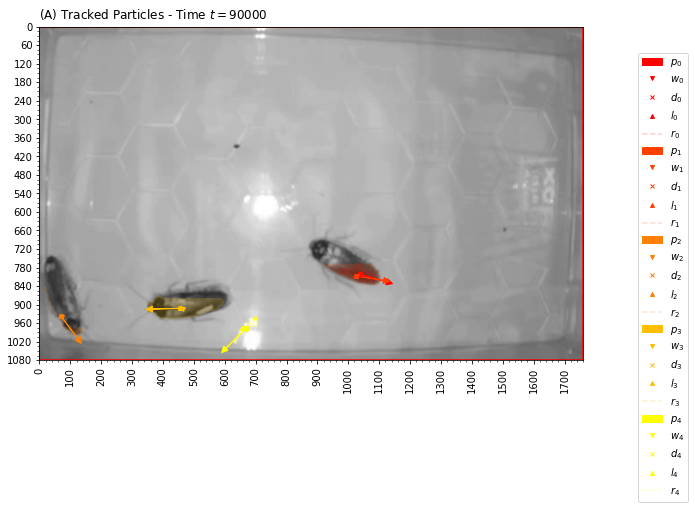

In [10]:
# Original frame
if len(times_new_2) == 0:
    times_new_2 = [t0]
time = times_new_2[0]
reinforce_boundaries = True
remove_boundaries_new = False
type = "local equalized"
clip_limit = 0.05
x_bounds = x_bounds  # Range: [0, 1080]
y_bounds = y_bounds  # Range: [0, 1920]
region_area_min = 200
axis_major_min = 94
eccentricity_max = 0.99
width = 10
n_x_breaks = 20
n_y_breaks = 20
x_zoom = None  # x_zoom
y_zoom = None  # y_zoom
fancy_legend = True
x_legend = 1.001
y_legend = 0.821

df_tracked_frame = tp.process_frame(
    reinforce_boundaries=reinforce_boundaries,
    remove_holes=remove_holes_new,
    remove_boundaries=remove_boundaries_new,
    type=type,
    clip_limit=clip_limit,
    threshold=threshold_new,
    sigma=sigma_new,
    x_bounds=x_bounds,
    y_bounds=y_bounds,
    region_area_min=region_area_min,
    axis_major_min=axis_major_min,
    eccentricity_max=eccentricity_max,
    tracking_list=[time, reader.get_data(time)]
)

plt_tp.plot_tracking_frame(
    reader=reader,
    df_tracked_frame=df_tracked_frame,
    width=width,
    n_x_breaks=n_x_breaks,
    n_y_breaks=n_y_breaks,
    x_bounds=x_bounds,
    y_bounds=y_bounds,
    x_zoom=x_zoom,
    y_zoom=y_zoom,
    fancy_legend=fancy_legend,
    x_legend=x_legend,
    y_legend=y_legend,
    save_figure=False,
    output_path=output_path,
    output_name=video_name,
    time=time
)

df_tracked_frame


In [11]:
df_tracked_frames_final = pd.concat([df_tracked_frames, df_tracked_frames_new], ignore_index=True)
df_tracked_frames_final = (df_tracked_frames_final[
    df_tracked_frames_final["id_count"] == df_tracked_frames_final.groupby(["time", "id"])["id_count"].transform("max")
])
df_tracked_frames_final = df_tracked_frames_final.drop_duplicates(subset=["id", "time"], keep="first").sort_values(["time", "id"])

cols = ["id", "time", "id_count", "position_x", "position_y"]
print("First iteration: Tracking with threshold {}".format(threshold))

if len(times_new_2) == 0:
    times_new_2 = [t0]
print(df_tracked_frames[df_tracked_frames["time"] == times_new_2[0]][cols])
print("\nSecond iteration: Tracking with threshold {}".format(threshold_new))
print(df_tracked_frames_new[df_tracked_frames_new["time"] == times_new_2[0]][cols])
print("\nFinal tracked data")
print(df_tracked_frames_final[df_tracked_frames_final["time"] == times_new_2[0]][cols])

First iteration: Tracking with threshold 0.19
   id   time  id_count   position_x   position_y
0   0  90000         7  1032.935980   791.631115
1   1  90000         7    54.432182   827.028480
2   2  90000         7   105.216605   962.624723
3   3  90000         7   482.709566   899.979184
4   4  90000         7   668.144796   976.665158
5   5  90000         7  1280.621918  1056.293814
6   6  90000         7   494.446527  1068.862918

Second iteration: Tracking with threshold 0.11
   id   time  id_count   position_x   position_y
0   0  90000         7  1032.935980   791.631115
1   1  90000         7    54.432182   827.028480
2   2  90000         7   105.216605   962.624723
3   3  90000         7   482.709566   899.979184
4   4  90000         7   668.144796   976.665158
5   5  90000         7  1280.621918  1056.293814
6   6  90000         7   494.446527  1068.862918

Final tracked data
   id   time  id_count   position_x   position_y
0   0  90000         7  1032.935980   791.631115
1   

## Visualize final data

In [12]:
df_tracked_frames_final["id_count"].value_counts(dropna=False, sort=False)

id_count
7    11984
6    14424
5     6825
4      964
8     2824
9      261
Name: count, dtype: int64

In [13]:
width = 10
n_x_breaks = 20
n_y_breaks = 20
x_bounds = x_bounds  # Range: [0, 1080]
y_bounds = y_bounds  # Range: [0, 1920]
x_zoom = None  # x_zoom
y_zoom = None  # y_zoom
fancy_legend = True
x_legend = 1.001
y_legend = 0.821

if save_figures:
    df_data = df_tracked_frames_final[["time", "id_count", "id"]].drop_duplicates()
    df_data["id_included"] = True
    df_data["orientation_included"] = True

    df_tracked_frames_final_ = df_tracked_frames_final.copy()
    if "coord_x" in df_tracked_frames_final_.columns:
        # Change coords of contours to str for correct loading of data as CSV
        df_tracked_frames_final_["coords_x"] = df_tracked_frames_final_["coords_x"].apply(lambda x: " ".join(map(str, x)))
        df_tracked_frames_final_["coords_y"] = df_tracked_frames_final_["coords_y"].apply(lambda x: " ".join(map(str, x)))
    df_tracked_frames_final_.to_csv("{}/tracked_{}_{}.csv".format(output_path, video_name, partition), index=False)

    # for time in tqdm(times):
    for time in tqdm([0, 10, 20, 50, 100]):
        plt_tp.plot_tracking_frame(
            reader=reader,
            df_tracked_frame=df_tracked_frames_final,
            width=width,
            n_x_breaks=n_x_breaks,
            n_y_breaks=n_y_breaks,
            x_bounds=x_bounds,
            y_bounds=y_bounds,
            x_zoom=x_zoom,
            y_zoom=y_zoom,
            fancy_legend=fancy_legend,
            x_legend=x_legend,
            y_legend=y_legend,
            save_figure=True,
            output_path=output_path,
            output_name=video_name,
            time=time
        )

    df_data.to_csv("{}/{}/df_control_{}.csv".format(output_path, video_name, partition), index=False)


100%|██████████| 5/5 [00:03<00:00,  1.55it/s]


In [14]:
# Original frame
width = 10
n_x_breaks = 20
n_y_breaks = 20
x_bounds = x_bounds  # Range: [0, 1080]
y_bounds = y_bounds  # Range: [0, 1920]
x_zoom = None  # x_zoom
y_zoom = None  # y_zoom
fancy_legend = True
x_legend = 1.050
y_legend = 0.951
interval = 500
fps = 2
output_name = "tracked_" + video_name + "_" + str(partition)

if save_tracking:
    plt_tp.plot_tracking_animation(
        reader=reader,
        df_tracked_frames=df_tracked_frames_final,
        width=width,
        n_x_breaks=n_x_breaks,
        n_y_breaks=n_y_breaks,
        x_bounds=x_bounds,
        y_bounds=y_bounds,
        x_zoom=x_zoom,
        y_zoom=y_zoom,
        fancy_legend=fancy_legend,
        x_legend=x_legend,
        y_legend=y_legend,
        interval=interval,
        fps=fps,
        output_path=output_path,
        output_name=output_name
    )

In [15]:
from shutil import make_archive

make_archive(
    "{}/{}".format(output_path, video_name),
    "zip",
    output_path,
    "{}/{}".format(output_path, video_name)
)

'/home/fabril/Github/High_Order_Interactions/tracking_videos/output_files/3n_3m_0f_230522_1.zip'